In [1]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer


In [2]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.OUTPUT_DIR = "../models/rcnn_R_101"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

cfg.DATASETS.TRAIN = ("tree_train",)
cfg.DATASETS.TEST = ("tree_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 10000
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5


In [3]:

torch.cuda.empty_cache()

predictor = DefaultPredictor(cfg)

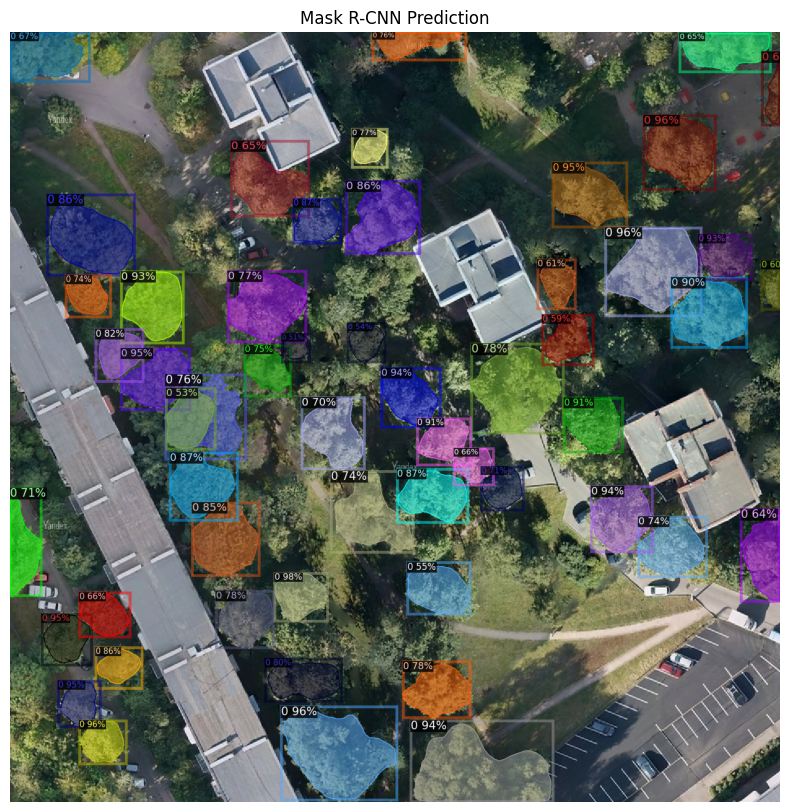

In [14]:
file_path = "../data/examples/1.jpg"  # Укажите путь к вашему PNG изображению
image = cv2.imread(file_path)

# Проверка, что изображение загружено
if image is None:
    raise ValueError(f"Не удалось загрузить изображение по пути: {file_path}")

outputs_2 = predictor(image)

# === Визуализация предсказания ===
v_pred_2 = Visualizer(image[:, :, ::-1], MetadataCatalog.get("tree_val"), scale=1.0)
out_pred_2 = v_pred_2.draw_instance_predictions(outputs_2["instances"].to("cpu"))

plt.figure(figsize=(10, 10))
plt.imshow(out_pred_2.get_image())
plt.title("Mask R-CNN Prediction")
plt.axis("off")
plt.show()